# Data Processing and Feature Engineering (Day 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

### Load Datasets

In [71]:
train = pd.read_csv('train.csv',parse_dates=['date'])
test = pd.read_csv('test.csv') 
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv',parse_dates=['date'])
holidays_event = pd.read_csv('holidays_events.csv',parse_dates=['date'])

### Check the datasets

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [73]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [74]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [75]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [76]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [77]:
holidays_event.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


### Handle missing values in oil prices by filling gaps with interpolation

In [78]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In oil dataset we have 43 missing values are available so using interpolation we filling the values

In [79]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method = 'linear')

In [80]:
oil.isnull().sum()

date          0
dcoilwtico    1
dtype: int64

In [81]:
oil.dropna(inplace = True)

After using above method we remove all missing values.

### Convert date columns to proper datetime formats

In [82]:
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_event['date'] = pd.to_datetime(holidays_event['date'])
test['date'] = pd.to_datetime(test['date'])

### Merge data from stores.csv, oil.csv, and holidays_events.csv into the main dataset

In [83]:
train = train.merge(stores , on = 'store_nbr', how = 'left')
train = train.merge(oil , on = 'date', how = 'left')
train = train.merge(holidays_event , on = 'date', how = 'left')

test = test.merge(stores , on = 'store_nbr', how = 'left')
test = test.merge(oil , on = 'date', how = 'left')
test = test.merge(holidays_event , on = 'date', how = 'left')

## Feature Engineering

### Time-based Features:   - Extract day, week, month, year, and day of the week.

In [84]:
train['day'] = train['date'].dt.day
train['week'] = train['date'].dt.isocalendar().week
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['day_of_week'] = train['date'].dt.dayofweek


In [85]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,type_y,locale,locale_name,description,transferred,day,week,month,year,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,1,1,1,2013,1


### Identify seasonal trends (e.g., are sales higher in December?)

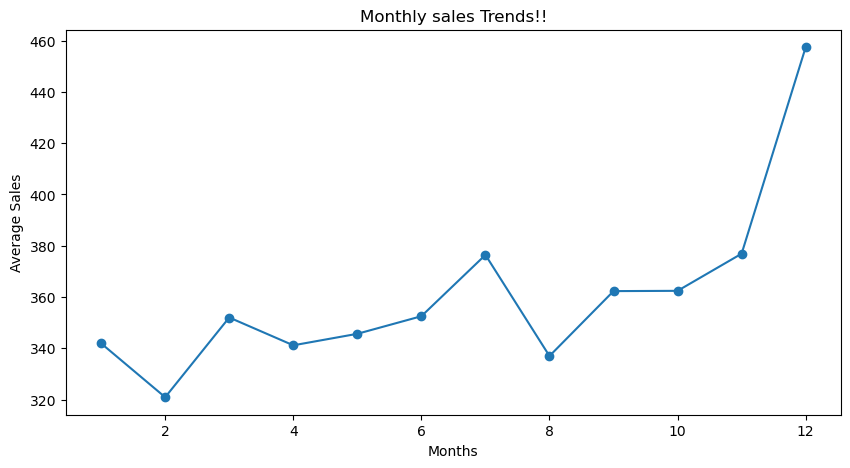

In [86]:
monthly_sales = train.groupby('month')['sales'].mean()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index , monthly_sales.values, marker = 'o', linestyle = "-")
plt.xlabel('Months')
plt.ylabel('Average Sales')
plt.title("Monthly sales Trends!!")
plt.show()

## Event-based Features:  

### Create binary flags for holidays, promotions, and economic events.

### Identify if a day is a government payday (15th and last day of the month).

In [87]:
train['is_holiday'] = train['type_y'].notna().astype(int)
train['is_gov_payday'] = train['date'].dt.day.isin([15]) | train['date'].dt.day.eq(train['date'].dt.days_in_month)
train['is_gov_payday'] = train['is_gov_payday'].astype(int)
train['promotion'] = (train['onpromotion'] > 0).astype(int)

### Consider earthquake impact (April 16, 2016) as a separate feature.

In [88]:
train['earthquake_impact'] = (train['date'] == '2016-04-06').astype(int)

### Rolling Statistics

##### Compute moving averages and rolling standard deviations for past sales.

In [89]:
train['sales_mean7'] = train['sales'].rolling(window = 7).mean()
train['sales_std7'] = train['sales'].rolling(window = 30).mean()

##### Include lagged features (e.g., sales from the previous week, previous month)

In [90]:
train['sales_lag7'] = train['sales'].shift(7)
train['sales_lag30'] = train['sales'].shift(30)

### Store-Specific Aggregations

#### Compute average sales per store type.


In [91]:
store_avg_sales = train.groupby('type_x')['sales'].mean().reset_index()

In [92]:
train = train.merge(store_avg_sales, on = 'type_x',suffixes = ('','_avg_store'))

#### Identify top-selling product families per cluster.

In [93]:
cluster_top_products = train.groupby(['cluster','family'])['sales'].sum().reset_index()

In [94]:
top_products = cluster_top_products.groupby('cluster').first().reset_index()

## Exploratory Data Analysis (EDA)

#### Visualize sales trends over time.

In [60]:
print("Exploratory Data Analysis")
plt.figure(figsize=(12,6))
sns.lineplot(x='date' ,y='sales',data = train,labels = 'Sales Trands')
plt.title("sales trends over time")
plt.xlable("Date")
plt.ylable("Sales")
plt.legend()
plt.show()

#### Analyze sales before and after holidays and promotions.

C:\Users\HP\AppData\Local\Temp\ipykernel_1460\2684187646.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  holiday_sales = train.groupby(['date','is_holiday']).mean().reset_index()


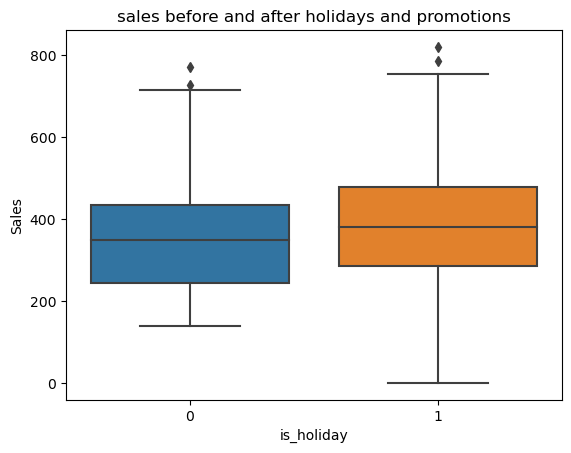

In [63]:
holiday_sales = train.groupby(['date','is_holiday']).mean().reset_index()
sns.boxplot(x="is_holiday",y='sales',data = holiday_sales)
plt.title("sales before and after holidays and promotions")
plt.xlabel("is_holiday")
plt.ylabel("Sales")
plt.show()

### Check correlations between oil prices and sales trends.

In [95]:
corrlation = train[['sales','dcoilwtico']].corr()

In [96]:
print("correlations between oil prices and sales:",corrlation)


correlations between oil prices and sales:                sales  dcoilwtico
sales       1.000000   -0.079009
dcoilwtico -0.079009    1.000000


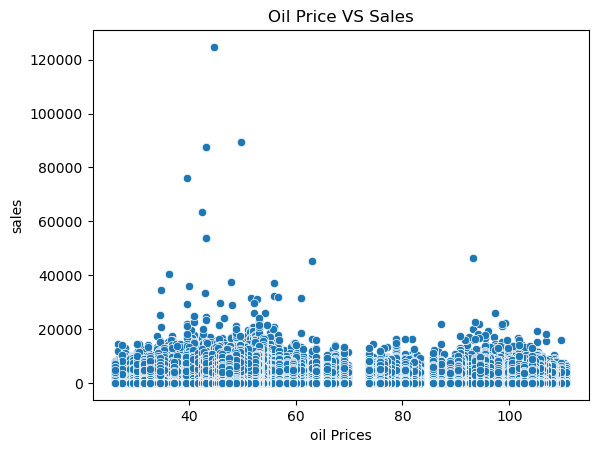

In [97]:
sns.scatterplot(x='dcoilwtico',y='sales',data =train)
plt.title("Oil Price VS Sales")
plt.xlabel("oil Prices")
plt.ylabel("sales")
plt.show()

### Identify anomalies in the data

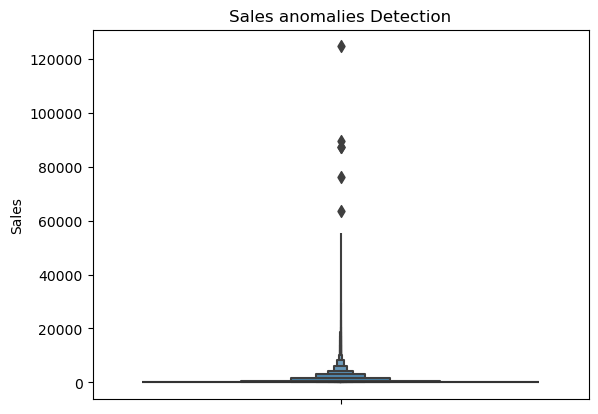

In [98]:
sns.boxenplot(y = 'sales',data=train)
plt.title("Sales anomalies Detection")
plt.ylabel("Sales")
plt.show()

In [99]:
train.to_csv("Preprossed_data.csv",index=False)


## Data Cleaning and Preprossecing PArt is completed